##Importing Libraries necessary

In [69]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
from tqdm import tqdm
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Dense, Dropout, Flatten
%matplotlib inline

## Data Preprocessing

In [55]:
# Reading the csv file
train_data = pd.read_csv('/content/drive/MyDrive/Projects/AML2/annotations.csv' )
pd.set_option('precision', 0)

train_data.head()

,Image_Name,Wrinkles,Freakles,Glasses,Hair_color,Hair_top
0,emotionet_5_third_50000_100012.jpg,1,0,0,2,2
1,emotionet_5_third_50000_100015.jpg,0,0,0,1,2
2,emotionet_5_third_50000_100029.jpg,0,0,0,0,2
3,emotionet_5_third_50000_100052.jpg,0,0,0,1,2
4,emotionet_5_third_50000_100055.jpg,0,0,0,0,2


In [56]:
# Displaying the classes for classification 
train_data.columns

Index(['Image_Name', 'Wrinkles', 'Freakles', 'Glasses', 'Hair_color',
       'Hair_top'],
      dtype='object')

In [57]:
#assigning the columns list to a var cols
cols = ['Wrinkles', 'Freakles', 'Glasses', 'Hair_color',
       'Hair_top']

In [62]:
# Load the dataset
train_img = [] # initializing an emopty list
for k in tqdm(range(train_data.shape[0])):
  imgs = image.load_img('/content/drive/MyDrive/Projects/AML2/emotionet_5/third_50000/'+train_data['Image_Name'][k],target_size=(100,100,3))
  imgs = image.img_to_array(imgs)
  imgs = imgs/255
  train_img.append(imgs)

tf.convert_to_tensor(train_img)
X = np.array(train_img)


100%|██████████| 1968/1968 [00:18<00:00, 104.39it/s]


In [63]:
y = np.array(train_data.drop(['Image_Name', 'Wrinkles'],axis=1))

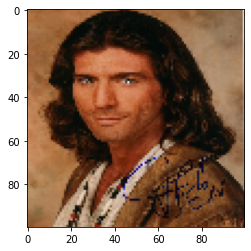

In [64]:
plt.imshow(X[23])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


## Preparing the Model

In [70]:
model = models.Sequential()
model.add(layers.Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(250, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [72]:
# Model Summary 
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 50)        1400      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 75)        33825     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 75)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 125)       84500     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 125)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense (Dense)                (None, 250)              

In [77]:
# Model Compilation
model.compile(loss='mean_squared_logarithmic_error',
              metrics=['accuracy'],
              optimizer=optimizers.Adamax(learning_rate = 0.002, beta_1 = 0.9, beta_2 = 0.999))

In [78]:
train_data_gen = ImageDataGenerator( rescale=1./255, 
                                   rotation_range=20,
                                   width_shift_range = 0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)
val_data_gen = ImageDataGenerator(rescale=1./255)

In [86]:
#Splitting data into train and validation sets

#Train Images set
training_generator = train_data_gen.flow_from_dataframe(dataframe= train_data[0:1100],
                                        directory = '/content/drive/MyDrive/Projects/AML2/emotionet_5/third_50000/',
                                        x_col="Image_Name",
                                        y_col=cols,
                                        batch_size=32,
                                        seed=42,
                                        shuffle=True,
                                        class_mode="raw",
                                        target_size=(32,32)
                                        )

#Validation Images Set
validate_generator  = val_data_gen.flow_from_dataframe(dataframe = train_data[1100:],
                                        directory = '/content/drive/MyDrive/Projects/AML2/emotionet_5/third_50000/',
                                        x_col="Image_Name",
                                        y_col=cols,
                                        batch_size=32,
                                        seed=42,
                                        shuffle=True,
                                        class_mode="raw",
                                        target_size=(32,32) 
                                   )


Found 1100 validated image filenames.
Found 868 validated image filenames.


In [92]:
# Model Training
hist = model.fit(training_generator,
                    steps_per_epoch= 30,
                    validation_data=validate_generator,
                    validation_steps= 4,
                    epochs = 95)

Epoch 1/95
30/30 [==============================] - 12s 409ms/step - loss: 0.2344 - accuracy: 0.6760 - val_loss: 0.2555 - val_accuracy: 0.4844
Epoch 2/95
30/30 [==============================] - 11s 382ms/step - loss: 0.2345 - accuracy: 0.6562 - val_loss: 0.2427 - val_accuracy: 0.4297
Epoch 3/95
30/30 [==============================] - 11s 377ms/step - loss: 0.2390 - accuracy: 0.6617 - val_loss: nan - val_accuracy: 0.4922
Epoch 4/95
30/30 [==============================] - 11s 367ms/step - loss: 0.2362 - accuracy: 0.6713 - val_loss: nan - val_accuracy: 0.4688
Epoch 5/95
30/30 [==============================] - 11s 370ms/step - loss: 0.2340 - accuracy: 0.6552 - val_loss: nan - val_accuracy: 0.4609
Epoch 6/95
30/30 [==============================] - 11s 374ms/step - loss: 0.2366 - accuracy: 0.6851 - val_loss: 0.2621 - val_accuracy: 0.4453
Epoch 7/95
30/30 [==============================] - 11s 373ms/step - loss: 0.2367 - accuracy: 0.6606 - val_loss: nan - val_accuracy: 0.5078
Epoch 8/95


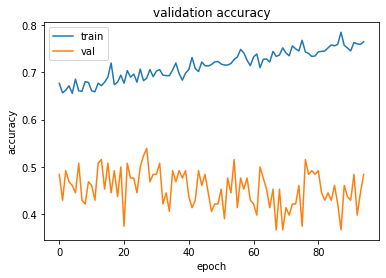

In [93]:
#accuracy curve
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

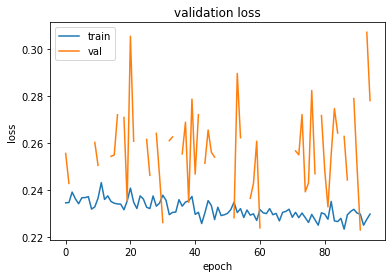

In [94]:
#loss curve
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [96]:
# saving the model for future purposes

model.save("/content/drive/MyDrive/Projects/AML2/model.hd5")

model.save_weights("/content/drive/MyDrive/Projects/AML2/model_weights.hd5")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Projects/AML2/model.hd5/assets
